<a href="https://colab.research.google.com/github/TheAmericanoO/Mini-Project-DADS5001/blob/main/Mini_Project_6420422023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Pandas 1.3.5
NumPy 1.21.6
Matplotlib 3.2.2
Seaborn 0.11.2


##**Load Dataset of English Premier League Data Season 2020-2021**

> *dimension: row = 498 / col = 9*

source: https://www.kaggle.com/datasets/omkargowda/football-players-stats-premier-league-20212022

In [198]:
url = 'https://drive.google.com/file/d/1xLnUiAEQvDyYXnaJFEf6-olQp_y6FMuo/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           498 non-null    object 
 1   Squad            498 non-null    object 
 2   G+A-PK           498 non-null    float64
 3   npxG+xA.1        498 non-null    float64
 4   ShotCreate.1     498 non-null    float64
 5   Goal Creating.1  498 non-null    float64
 6   PassComplete     498 non-null    float64
 7   Shots.1          498 non-null    float64
 8   ShotsOnTarget.1  498 non-null    float64
dtypes: float64(7), object(2)
memory usage: 35.1+ KB




,Player,Squad,G+A-PK,npxG+xA.1,ShotCreate.1,Goal Creating.1,PassComplete,Shots.1,ShotsOnTarget.1
0,Pierre Højbjerg,Tottenham,0.16,0.08,1.0,0.21,0.89,0.37,0.18
1,Hugo Lloris,Tottenham,0.00,0.00,0.0,0.03,0.72,0.00,0.00
2,Emiliano Martínez,Aston Villa,0.00,0.01,0.0,0.03,0.66,0.00,0.00
3,Aaron Ramsdale,Sheffield Utd,0.00,0.00,0.0,0.00,0.49,0.00,0.00
4,Kasper Schmeichel,Leicester City,0.00,0.00,0.0,0.00,0.73,0.00,0.00


###**ตรวจสอบข้อมูลนักฟุตบอลชื่อซ้ำ**


> พบว่ามีชื่อซ้ำ 6 คน



In [199]:
df[df.duplicated(['Player'])]

,Player,Squad,G+A-PK,npxG+xA.1,ShotCreate.1,Goal Creating.1,PassComplete,Shots.1,ShotsOnTarget.1
393,Ainsley Maitland-Niles,Arsenal,0.00,0.06,1.32,0.15,0.76,0.73,0.22
415,Takumi Minamino,Liverpool,0.31,0.20,1.39,0.13,0.72,1.65,0.51
426,Mathew Ryan,Arsenal,0.00,0.00,0.00,0.00,0.79,0.00,0.00
435,Joe Willock,Arsenal,0.00,0.18,2.48,0.28,0.77,1.56,1.10
484,Ruben Loftus-Cheek,Chelsea,0.00,0.00,2.50,0.00,0.83,1.74,0.38
489,Ross Barkley,Chelsea,0.00,0.22,4.41,0.29,0.81,2.23,0.65


###**ลบข้อมูลนักฟุตบอลชื่อซ้ำ โดยเลือกลบข้อมูลที่อยู่ด้านล่าง**

In [200]:
df = df.drop_duplicates(subset='Player').reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            492 non-null    int64  
 1   Player           492 non-null    object 
 2   Squad            492 non-null    object 
 3   G+A-PK           492 non-null    float64
 4   npxG+xA.1        492 non-null    float64
 5   ShotCreate.1     492 non-null    float64
 6   Goal Creating.1  492 non-null    float64
 7   PassComplete     492 non-null    float64
 8   Shots.1          492 non-null    float64
 9   ShotsOnTarget.1  492 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 38.6+ KB


###**สร้างตัวแปรที่จะเป็นข้อมูลที่ใช้ในการพิจารณาค่าความสามารถในสนามของนักฟุตบอล**

> โดยสร้างคอลัมน์ใหม่ **'PerformanceAvg'** เฉลี่ยค่าในคอลัมน์ 'G+A-PK' / 'npxG+xA.1' / 'ShotCreate.1'	/ 'Goal Creating.1'	/ 'PassComplete	Shots.1'	/ 'ShotsOnTarget.1'

In [201]:
df['PerformanceAvg'] = (df['G+A-PK']+df['npxG+xA.1']+df['ShotCreate.1']+df['Goal Creating.1']+df['PassComplete']+df['Shots.1']+df['ShotsOnTarget.1'])/7
df

,index,Player,Squad,G+A-PK,npxG+xA.1,ShotCreate.1,Goal Creating.1,PassComplete,Shots.1,ShotsOnTarget.1,PerformanceAvg
0,0,Pierre Højbjerg,Tottenham,0.16,0.08,1.00,0.21,0.89,0.37,0.18,0.412857
1,1,Hugo Lloris,Tottenham,0.00,0.00,0.00,0.03,0.72,0.00,0.00,0.107143
2,2,Emiliano Martínez,Aston Villa,0.00,0.01,0.00,0.03,0.66,0.00,0.00,0.100000
3,3,Aaron Ramsdale,Sheffield Utd,0.00,0.00,0.00,0.00,0.49,0.00,0.00,0.070000
4,4,Kasper Schmeichel,Leicester City,0.00,0.00,0.00,0.00,0.73,0.00,0.00,0.104286
...,...,...,...,...,...,...,...,...,...,...,...
487,493,Niall Huggins,Leeds United,0.00,0.00,0.00,0.00,0.74,0.00,0.00,0.105714
488,494,Leif Davis,Leeds United,0.00,0.00,2.73,0.00,0.84,0.00,0.00,0.510000
489,495,Rekeem Harper,West Brom,0.00,0.12,0.00,0.00,0.81,2.81,2.81,0.935714
490,496,Patrick Cutrone,Wolves,0.00,0.61,0.00,0.00,0.80,3.60,0.00,0.715714


##**Load Dataset Market Value of Players 2021**
> *dimension: row = 2,643 / col = 8*

**bold text**> *Value: Pound (£)*

source: https://github.com/sanjitva/Predicting-Football-Player-Transfer-Values#fbref

In [202]:
url = 'https://drive.google.com/file/d/11eX9zpiltOt7nMNLNmNqZ-OnqrC1kZIv/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
transfer = pd.read_csv(url)
transfer.info()
print('\n')
transfer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Player               2643 non-null   object
 1   Club                 2643 non-null   object
 2   Age                  2643 non-null   int64 
 3   Position             2643 non-null   object
 4   Nation               2643 non-null   object
 5   Continent            2643 non-null   object
 6   Value                2643 non-null   int64 
 7   Contract Years Left  2643 non-null   object
 8   League               2643 non-null   object
dtypes: int64(2), object(7)
memory usage: 186.0+ KB




,Player,Club,Age,Position,Nation,Continent,Value,Contract Years Left,League
0,Kylian Mbappé,Paris Saint-Germain,22,attack,France,Europe,144000000,1,Ligue 1
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,Europe,117000000,3,Bundesliga
2,Harry Kane,Tottenham Hotspur,28,attack,England,Europe,108000000,3,Premier League
3,Jadon Sancho,Manchester United,21,attack,England,Europe,90000000,5,Premier League
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,Africa,90000000,2,Premier League


In [203]:
#ปรับ Market Value ให้เป็นหน่วย ล้านปอนด์

transfer.Value = transfer.Value/1000000
transfer

,Player,Club,Age,Position,Nation,Continent,Value,Contract Years Left,League
0,Kylian Mbappé,Paris Saint-Germain,22,attack,France,Europe,144.000,1,Ligue 1
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,Europe,117.000,3,Bundesliga
2,Harry Kane,Tottenham Hotspur,28,attack,England,Europe,108.000,3,Premier League
3,Jadon Sancho,Manchester United,21,attack,England,Europe,90.000,5,Premier League
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,Africa,90.000,2,Premier League
...,...,...,...,...,...,...,...,...,...
2638,Michele Laraspata,Parma Calcio 1913,20,Defender,Italy,Europe,0.045,3,Serie A
2639,Alessandro Berardi,Hellas Verona,30,Goalkeeper,Italy,Europe,0.045,2,Serie A
2640,Mamadou Mbow,Stade Reims,21,Defender,Senegal,Africa,0.045,2,Ligue 1
2641,Alessandro Martella,Parma Calcio 1913,20,Defender,Italy,Europe,0.023,3,Serie A


##**รวมข้อมูลจาก dataframe 2 อัน เข้าด้วยกัน**

In [265]:
df_new = pd.merge(df, transfer, on='Player')
df_new.info()
print('n')
df_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 384
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                385 non-null    int64  
 1   Player               385 non-null    object 
 2   Squad                385 non-null    object 
 3   G+A-PK               385 non-null    float64
 4   npxG+xA.1            385 non-null    float64
 5   ShotCreate.1         385 non-null    float64
 6   Goal Creating.1      385 non-null    float64
 7   PassComplete         385 non-null    float64
 8   Shots.1              385 non-null    float64
 9   ShotsOnTarget.1      385 non-null    float64
 10  PerformanceAvg       385 non-null    float64
 11  Club                 385 non-null    object 
 12  Age                  385 non-null    int64  
 13  Position             385 non-null    object 
 14  Nation               385 non-null    object 
 15  Continent            385 non-null    obj

,index,Player,Squad,G+A-PK,npxG+xA.1,ShotCreate.1,Goal Creating.1,PassComplete,Shots.1,ShotsOnTarget.1,PerformanceAvg,Club,Age,Position,Nation,Continent,Value,Contract Years Left,League
0,1,Hugo Lloris,Tottenham,0.00,0.00,0.00,0.03,0.72,0.00,0.00,0.107143,Tottenham Hotspur,34,Goalkeeper,France,Europe,8.10,1,Premier League
1,2,Emiliano Martínez,Aston Villa,0.00,0.01,0.00,0.03,0.66,0.00,0.00,0.100000,Aston Villa,29,Goalkeeper,Argentina,South America,31.50,3,Premier League
2,3,Aaron Ramsdale,Sheffield Utd,0.00,0.00,0.00,0.00,0.49,0.00,0.00,0.070000,Arsenal FC,23,Goalkeeper,England,Europe,10.80,4,Premier League
3,4,Kasper Schmeichel,Leicester City,0.00,0.00,0.00,0.00,0.73,0.00,0.00,0.104286,Leicester,34,Goalkeeper,Denmark,Europe,5.40,2,UNKNOWN
4,5,James Ward-Prowse,Southampton,0.32,0.17,2.00,0.29,0.81,1.03,0.47,0.727143,Southampton FC,26,midfield,England,Europe,27.00,5,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,478,Timothy Fosu-Mensah,Manchester Utd,0.00,0.34,4.50,0.00,0.87,1.13,0.00,0.977143,Bayer 04 Leverkusen,23,Defender,Netherlands,Europe,3.60,3,Bundesliga
381,479,Jonjoe Kenny,Everton,0.00,0.00,1.14,0.00,0.77,0.00,0.00,0.272857,Everton FC,24,Defender,England,Europe,5.22,1,Premier League
382,485,Cenk Tosun,Everton,0.00,0.25,3.75,1.87,0.80,0.00,0.00,0.952857,Everton FC,30,attack,Turkey,Asia,4.50,1,Premier League
383,488,Fikayo Tomori,Chelsea,0.00,0.00,0.00,0.00,0.93,0.00,0.00,0.132857,AC Milan,23,Defender,England,Europe,25.20,4,Serie A


##**คัดให้เหลือเฉพาะนักฟุตบอลในตำแหน่งกองกลาง (midfield) และกองหน้า (attack)**

> ใช้กรองที่คอลัมน์ Position



In [205]:
df_new = df_new[(df_new['Position']=='midfield') | (df_new['Position']=='attack')]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 4 to 382
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                206 non-null    int64  
 1   Player               206 non-null    object 
 2   Squad                206 non-null    object 
 3   G+A-PK               206 non-null    float64
 4   npxG+xA.1            206 non-null    float64
 5   ShotCreate.1         206 non-null    float64
 6   Goal Creating.1      206 non-null    float64
 7   PassComplete         206 non-null    float64
 8   Shots.1              206 non-null    float64
 9   ShotsOnTarget.1      206 non-null    float64
 10  PerformanceAvg       206 non-null    float64
 11  Club                 206 non-null    object 
 12  Age                  206 non-null    int64  
 13  Position             206 non-null    object 
 14  Nation               206 non-null    object 
 15  Continent            206 non-null    obj

###**ลักษณะของข้อมูล**

- จำนวนนักฟุตบอลตำแหน่งกองกลาง และกองหน้ามีจำนวนเท่ากันที่ 103 คน
- ค่าความสามารถของนักฟุตบอลพบว่ามีลักษณะเป็นกราฟเบ้ขวา โดยมีค่าเฉลี่ยอยู่ที่ 0.91
-  ค่าตัวนักฟุตบอลพบว่านักฟุตบอลที่มีค่าตัวน้อยจะมีจำนวนมากกว่านักฟุตบอลที่มีค่าตัวสูง โดยมีค่าเฉลี่ยอยู่ที่ 21.3 ล้านปอนด์
- สัญชาติของนักฟุตบอล: Europe (148) Africa (28) South America (24) Asia (4) North America (1) Oceania (1)

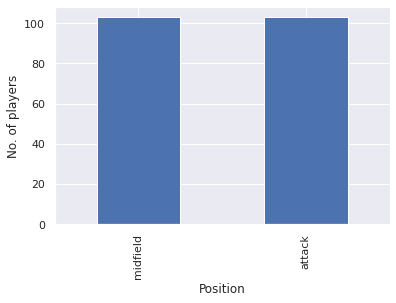

In [206]:
df_new['Position'].value_counts().plot.bar()

plt.xlabel('Position')
plt.ylabel('No. of players')
plt.show()

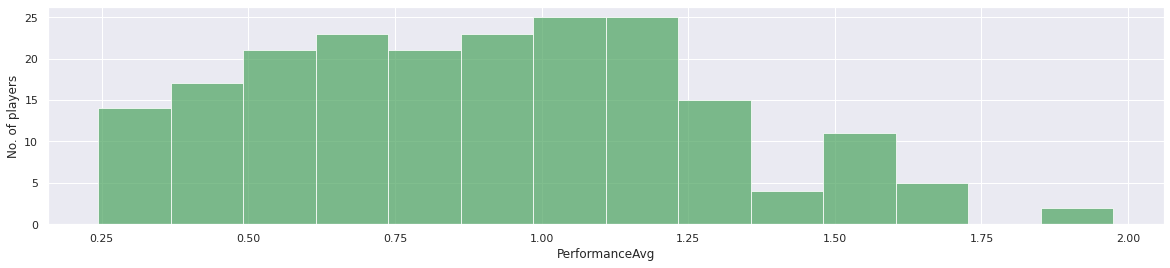

0.9080235783633841

In [253]:
n, bins, patches = plt.hist(df_new['PerformanceAvg'], 14, facecolor='g', alpha=0.75)

plt.xlabel('PerformanceAvg')
plt.ylabel('No. of players')
plt.show()

avg_perf = df_new['PerformanceAvg'].mean()
avg_perf

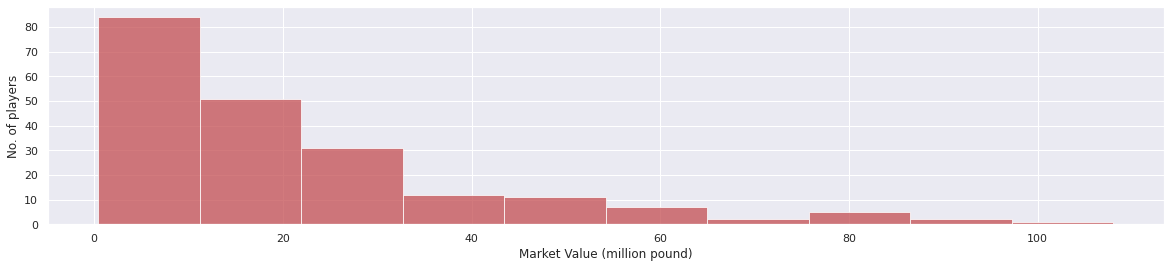

21.310339805825244

In [257]:
n, bins, patches = plt.hist(df_new['Value'], 10, facecolor='r', alpha=0.75)

plt.xlabel('Market Value (million pound)')
plt.ylabel('No. of players')
plt.show()

df_new['Value'].mean()

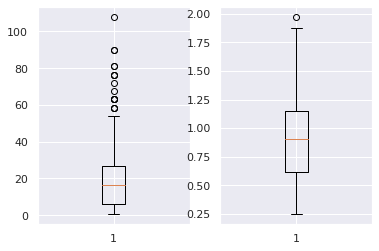

In [209]:
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_new['Value'])
axs[1].boxplot(df_new['PerformanceAvg'])

plt.show()

df_new['PerformanceAvg'].mean()
df_new['PerformanceAvg'].mean()

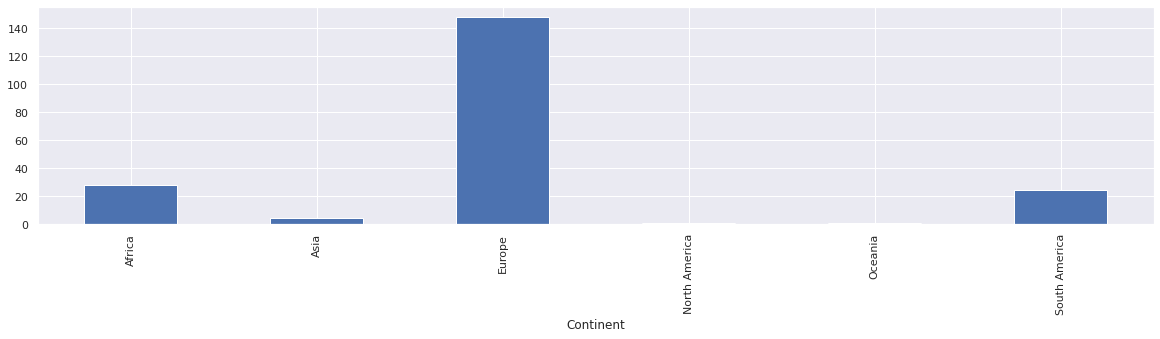

Continent
Africa            28
Asia               4
Europe           148
North America      1
Oceania            1
South America     24
Name: Value, dtype: int64

In [256]:
df_new.groupby('Continent')['Value'].count().plot.bar()
plt.show()
df_new.groupby('Continent')['Value'].count()

##คำถาม: ราคาค่าตัวของนักฟุตบอล แปรผันตาม ค่าความสามารถหรือไม่?

> Ans: จากกราฟด้านล่างจะเห็นว่าไม่ได้แปรผันตรงเสมอไป



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


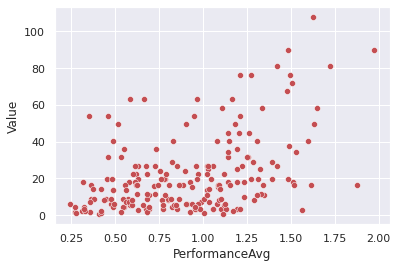

In [210]:
sns.scatterplot(x, y, data=df_new, facecolor = 'r' )
plt.show()

##คำถาม: ค่าเฉลี่ยของความสามารถและค่าตัวของนักเตะทั้งสองตำแหน่งมีลักษณะเป็นอย่างไร?

> Ans: ค่าเฉลี่ยของค่าตัวนักฟุตบอลตำแหน่งกองหน้าสูงกว่าประมาณ 7 แสนปอนด์ (คิดเป็น 3%) แต่ค่าเฉลี่ยความสามารถตำแหน่งกองหน้าสูงกว่าถึง 0.3 หรือคิดเป็น 30%



Value    20.970874
dtype: float64 PerformanceAvg    0.748696
dtype: float64
Value    21.649806
dtype: float64 PerformanceAvg    1.067351
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


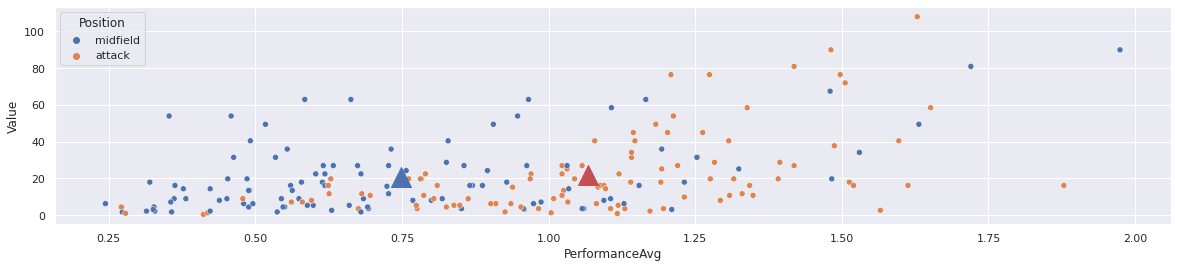

In [264]:
#หาค่าเฉลี่ยค่าตัวและค่าความสามารถของนักฟุตบอลตำแหน่งกองกลาง
m_avg_value = df_new.loc[df_new['Position']=='midfield', ['Value']].mean()
m_avg_perf = df_new.loc[df_new['Position']=='midfield', ['PerformanceAvg']].mean()
print(m_avg_value, m_avg_perf)

#หาค่าเฉลี่ยค่าตัวและค่าความสามารถของนักฟุตบอลตำแหน่งกองหน้า
a_avg_value = df_new.loc[df_new['Position']=='attack', ['Value']].mean()
a_avg_perf = df_new.loc[df_new['Position']=='attack', ['PerformanceAvg']].mean()
print(a_avg_value, a_avg_perf)

#plot กราฟให้เห็นการกระจายของนักฟุตบอลทั้ง 2 กลุ่ม
sns.set_style("darkgrid")

x = df_new['PerformanceAvg']
y = df_new['Value']
z = df_new['Continent']

sns.scatterplot(x, y, data=df_new, hue='Position')
plt.scatter(m_avg_perf, m_avg_value, marker='^', facecolor="b", s=400)
plt.scatter(a_avg_perf, a_avg_value, marker='^', facecolor="r", s=400)
plt.show()



##คำถาม: ค่าตัวของนักฟุตบอลจากแต่ละทวีปมีลักษณะเป็นอย่างไร?

> Ans: อันดับค่าตัวเฉลี่ยจากสูงสุดไปต่ำสุดเป็นดังนี้
Asia -> South America -> Africa -> Europe -> North America -> Oceania




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


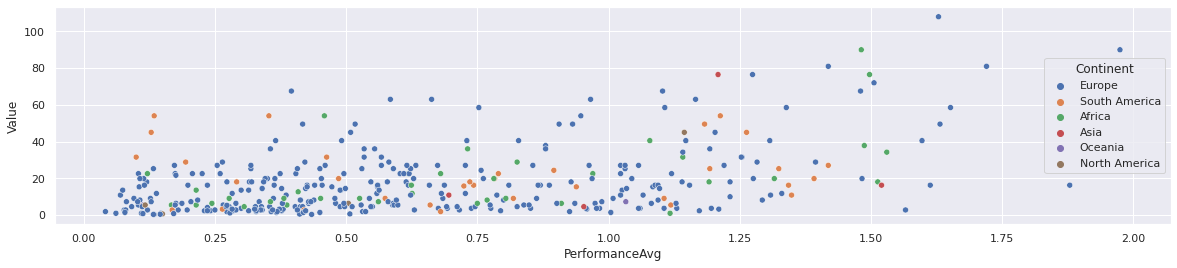

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


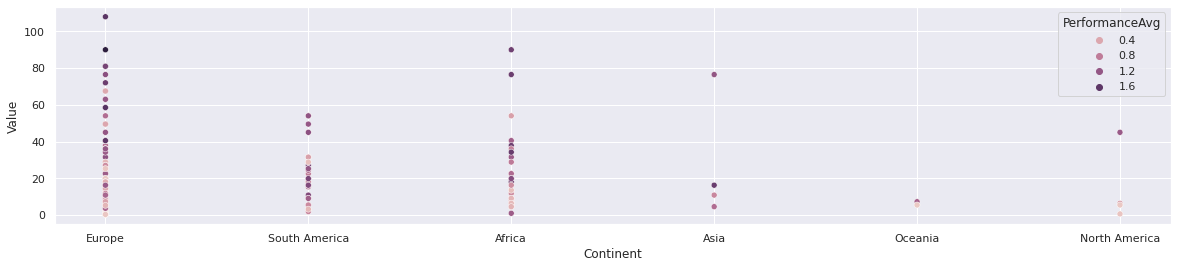

average EU = Value    16.880921
dtype: float64
average AF = Value    20.036842
dtype: float64
average SA = Value    22.281818
dtype: float64
average AS = Value    27.0
dtype: float64
average US = Value    14.31
dtype: float64
average OC = Value    6.3
dtype: float64


In [275]:
x = df_new['PerformanceAvg']
y = df_new['Value']
z = df_new['Continent']

sns.scatterplot(z, y, data=df_new, hue=x)
plt.show()

#สร้าง boxplot แสดงให้เห็นค่าตัวนักเตะจากทวีปต่าง ๆ
avg_val_EU = df_new.loc[df_new['Continent']=='Europe',['Value']].mean()
avg_val_AF = df_new.loc[df_new['Continent']=='Africa',['Value']].mean()
avg_val_SA = df_new.loc[df_new['Continent']=='South America',['Value']].mean()
avg_val_AS = df_new.loc[df_new['Continent']=='Asia',['Value']].mean()
avg_val_US = df_new.loc[df_new['Continent']=='North America',['Value']].mean()
avg_val_OC = df_new.loc[df_new['Continent']=='Oceania',['Value']].mean()
print(f'average EU = {avg_val_EU}')
print(f'average AF = {avg_val_AF}')
print(f'average SA = {avg_val_SA}')
print(f'average AS = {avg_val_AS}')
print(f'average US = {avg_val_US}')
print(f'average OC = {avg_val_OC}')

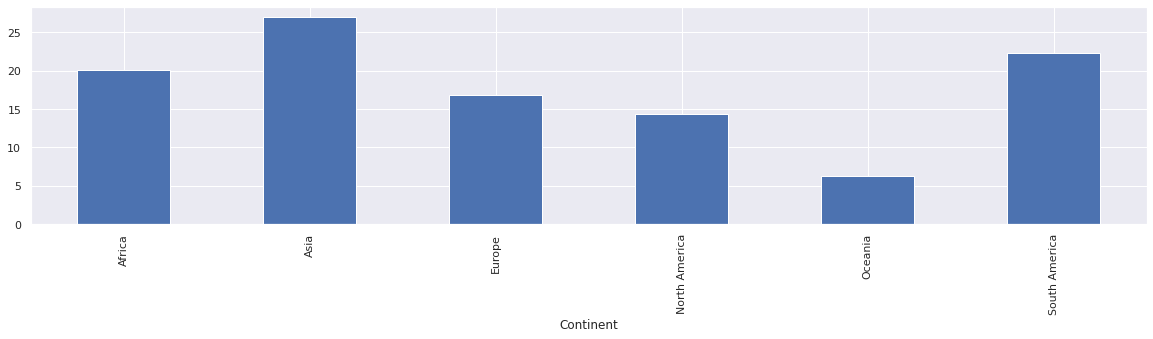

In [276]:
df_new.groupby('Continent')['Value'].mean().plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


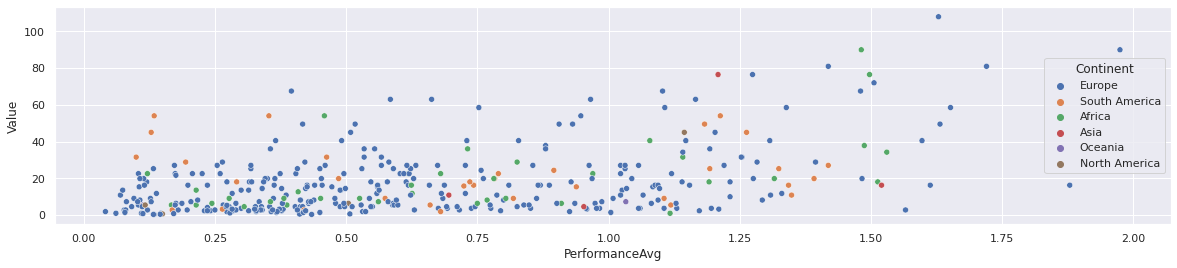

In [277]:
#เพิ่มเติมการแสดงข้อมูลค่าตัวและค่าความสามารถของนักฟุตบอลที่มาจากแต่ละทวีป แบ่งให้เห็นตามสี

x = df_new['PerformanceAvg']
y = df_new['Value']
z = df_new['Continent']

sns.scatterplot(x, y, data=df_new, hue='Continent', y_bins = 10)
plt.show()
